# Maximum Likelihood Estimation

- A gentle introduction to MLE. What a practitioner should know for applied work.


## Intuition


###### Find the parameters that would best describe (e.g., provide the "maximum likelihood" of) the observed data.

Suppose you have a set of data $\epsilon=\{-1.5, -0.7, -0.5, -0.2, -0.1, 0, 0.1, 0.2, 0.5, 0.7, 1.5 \}$,
and you _**believe**_ that the values are randomly and independently drawn from a normal
distribution: ${\epsilon}\sim N(\mu, \sigma^2)$. You are asked to find $\theta = (\mu, \sigma^2)$.

- Why would we care? Ex., earth quakes, height, IQ, etc.

- _**believe**_: an assumption is made.

- Based on the assumption, what would you guess for $\mu$ and $\sigma^2$ that would best describe the distribution of $\epsilon$?

Well, $\hat{\mu}=0$ should be obvious. How about $\hat{\sigma}^2$?


- the probability density function of $N(\mu, \sigma^2)$:
\begin{aligned}
f(\epsilon_i|\theta) = & \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left(\frac{\epsilon_i-\mu}{\sigma}\right)^2} \\
 = & \frac{1}{\sqrt{2 \pi} \sigma} \exp\left[{-\frac{1}{2}\left(\frac{\epsilon_i-\mu}{\sigma}\right)^2}\right].
\end{aligned}


Let's try $\hat{\theta} = (\hat{\mu} =0, \hat{\sigma}^2 = 0.5 )$. Then, the _**probability density**_ (not probability) that the value $-1.5$ is drawn from this distribution is $f(-1.5|\hat{\theta}) = \frac{1}{\sqrt{2 \pi} 0.707}  e^{-\frac{1}{2}(\frac{-1.5}{0.707})^2}=0.0594$. Similarly, $f(-0.7| \hat{\theta}) = 0.3456$. 

You can do this for all the values of $\epsilon$ listed above. If you multiply values of the densities together, it would be $4.219 \times 10^{-6}$.

In [4]:
using Distributions

e = (-1.5, -0.7, -0.5, -0.2, -0.1, 0, 0.1, 0.2, 0.5, 0.7, 1.5 )

mypdf(μ, σ², x) = pdf(Normal(μ, sqrt(σ²)), x)  # μ: mean, σ²: variance

println("The density at -1.5 is ", mypdf(0, 0.5, -1.5), ".\n")

println("The densities are: ", mypdf.(0, 0.5, e), ".\n" )

println("The product of the densities is ", prod(mypdf.(0, 0.5, e)), ".\n")  # the product of the numbers



The density at -1.5 is 0.05946514461181471.

The densities are: (0.05946514461181471, 0.3456374302052694, 0.43939128946772243, 0.5420673935524315, 0.5585758033944686, 0.5641895835477563, 0.5585758033944686, 0.5420673935524315, 0.43939128946772243, 0.3456374302052694, 0.05946514461181471).

The product of the densities is 4.218569906055765e-6.



### Is the _probability density_ the same as the _likelihood_? 


><div class="alert alert-block alert-info", style="max-width: 90%;">
>    
>- $f(\mbox{data}\ |\ \mbox{parameters})$:  the **probability density function**; 
>    
>- $L(\mbox{parameters}\ |\ \mbox{data})$: the **likelihood function** $\Rightarrow$ _**This!**_
>    
>- $L(\mbox{parameters}\ |\ \mbox{data}) \propto f(\mbox{data}\ |\ \mbox{parameters})$. 
></div>



What is the **likelihood** that all of the 11 values of $\epsilon$ are all independently drawn from $N(0, 0.5)$?

- The answer is to multiply all the likelihoods together!
$L =  \prod_{i=1} L_i= \prod_{i=1} f(\epsilon_i|\hat{\theta})=f(-1.5|\hat{\theta})\times
  f(-0.7|\hat{\theta})\times \ldots \times f(0.7|\hat{\theta})\times f(1.5|\hat{\theta})
   =  4.219 \times 10^{-6},$    
which is the **likelihood value** of the model.


- The $L_i$ is the **likelihood function** of the observation $i$ and the $L$ is the **likelihood function of the model**.


Let's try another set: $\hat{\theta} = (\hat{\mu} =0, \ \hat{\sigma}^2 = 0.6 )$.

   - $f(-1.5|\hat{\theta}) = \frac{1}{\sqrt{2 \pi} 0.7746} e^{-\frac{1}{2}(\frac{-1.5}{0.7746})^2}=0.0790$.
   - The likelihood value that all the $\epsilon$ are drawn from $N(0, 0.6)$
   is $4.263 \times 10^{-6}$.



In [3]:
@show prod(mypdf.(0, 0.6, e))  # the product of the numbers

prod(mypdf.(0, 0.6, e)) = 4.263374388734021e-6


4.263374388734021e-6

## Grid Search

We can do this for a range of possible values ("grid") of $\hat{\sigma}^2$ and look for the one that yields the largest likelihood value. For example, $\hat{\sigma}^2 = 0.2,\ 0.3,\ 0.4, \dots, 1.0$. The following is the likelihood profile:


 The optimal σ² is 0.553.


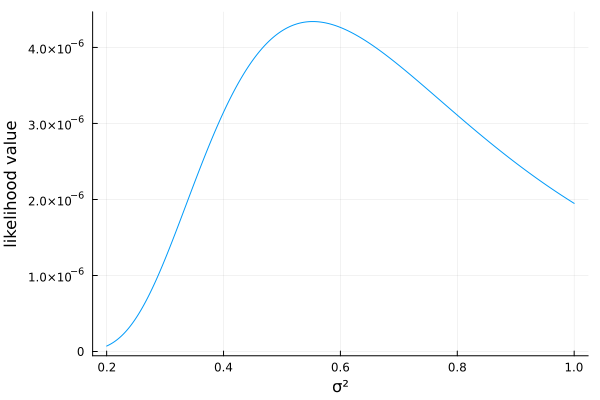

In [5]:
e = (-1.5, -0.7, -0.5, -0.2, -0.1, 0, 0.1, 0.2, 0.5, 0.7, 1.5 )

σ²_list = (0.2:0.001:1.0;)       # possible values of σ²

like_list = ones(length(σ²_list))

for i in eachindex(σ²_list)      # calculate the likelihood for each σ²
    like_list[i] = prod(mypdf.(0, σ²_list[i], e))
end


println("\n The optimal σ² is ",  σ²_list[argmax(like_list)], ".")


using Plots
plot(σ²_list ,like_list, xlabel="σ²", ylabel="likelihood value", legend=false)

In [4]:
# watch out the use of ;
[1:2:10]
[1:2:10;]

5-element Vector{Int64}:
 1
 3
 5
 7
 9

Continue this process, you'll find that the data of $\epsilon$ most likely comes from $\epsilon \sim N(0,0.553)$.

Note that if $\hat{\sigma}_*^2$ maximizes the likelihood function, then the tangent line on the profile at $\hat{\sigma}_*^2$ must have a slope equal to 0!

Essentially, we are looking for values of $\{ \mu,\sigma^2 \}$ that would maximize L (make the value of L the largest).

In the above example, we use only one parameter ($\sigma^2$) to find the maximum value of the model's likelihood. It is because we have set $\mu=0$. What if both of $\mu$ and $\sigma^2$ are unknown and they have to be determined simultaneously for the maximum likelihood? We could use the optimization methods we learned earlier, but a simple grid search should be illustrative.

μ_list[(argmax(like_list))[1]] = 0.308
σ²_list[(argmax(like_list))[2]] = 0.837


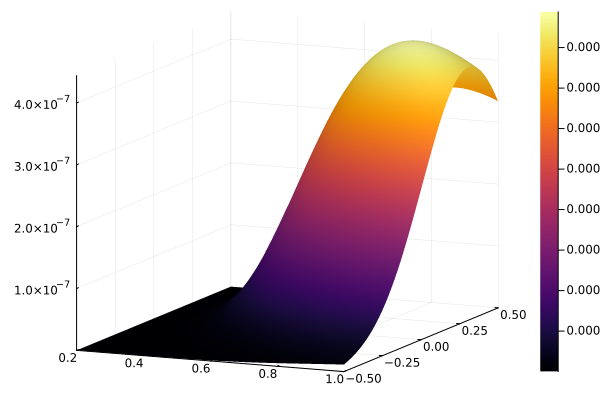

In [5]:
using Distributions, Plots

e = (-1.5, -0.7, -0.5, -0.2, -0.1, 0, 0.1, 0.2, 0.5, 0.7, 1.5 )

e = e .+ rand(length(e)) 

μ_list = (-0.5:0.001:0.5;)   # possible values of μ
σ²_list = (0.2:0.001:1.0;)   # possible values of σ²

like_list = ones(length(μ_list), length(σ²_list) )     # a matrix

for i in eachindex(μ_list)      # Could you write it using `map`?
    for j in eachindex(σ²_list)
        like_list[i,j] = prod( mypdf.(μ_list[i], σ²_list[j], e) )
    end    
end

@show μ_list[argmax(like_list)[1]]
@show σ²_list[argmax(like_list)[2]]

plot( σ²_list, μ_list, like_list, st= :surface)

### Why log-likelihood?

In the example, we have 11 observations, and the likelihood value is $L = \prod_\epsilon f(\epsilon) = 4.219 \times 10^{-6}$, which is quite small.

What if we have 400 observations? Suppose each $f(\epsilon_i) = 0.5$. Then, the likelihood value is $0.5^{400} = 5 \times 10^{-400}$ which is numerically unattainable to most computers.

Trick: Take log on $L$ to get the **log-likelihood value** of the model: $\ln L = \sum_\epsilon \ln f(\epsilon)$.
- In the above example, the **log-likelihood value** of the model is $400 \times \ln(0.5) = -277.259$, which is well-within the numerical range of modern computers.


- Because $\ln()$ is a monotone increasing transformation, the value of $\sigma^2$ that maximizes $L$ would also be the value that maximizes $\ln L$.


μ_list[(argmax(like_list))[1]] = 0.0
σ²_list[(argmax(like_list))[2]] = 0.553


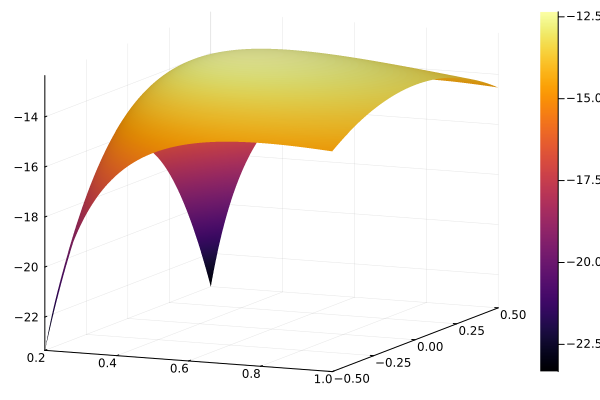

In [6]:
# Redo the exercise using log-likelihood (not going to see much difference)

e = (-1.5, -0.7, -0.5, -0.2, -0.1, 0, 0.1, 0.2, 0.5, 0.7, 1.5 )

# e = e .+ rand(length(e)) 

μ_list = (-0.5:0.001:0.5;)
σ²_list = (0.2:0.001:1.0;)   # possible values of σ²

like_list = ones(length(μ_list), length(σ²_list) )

for i in eachindex(μ_list)      # Could you write it using `map`?
    for j in eachindex(σ²_list)
        like_list[i,j] = sum( log.(mypdf.(μ_list[i], σ²_list[j], e)) )  # take log and take summation
    end    
end

@show μ_list[argmax(like_list)[1]]
@show σ²_list[argmax(like_list)[2]]

plot( σ²_list, μ_list, like_list, st= :surface)

## Numerical Optimization

The grid search approach, while easy to do, is not practical in most of the real work where we have many parameters and each of them is not likely to be bounded in a range. The number of grid points is going to be prohibitively large and the computation is going to be very slow.

We could use the function `newton_max_a` that you've programmed in the earlier homework. Recall that the model is $\ln L = \sum_\epsilon \ln f(\epsilon)$.

In [6]:
using LinearAlgebra, ForwardDiff, Random


function newton_max_a(f, init, ϵ, maxit)         # from earlier homework
    iter, Δ, x0, x1 = 1, fill(Inf, length(init)), init, init  # dimensions of f & init should be consistent
    ∇f(x) = ForwardDiff.gradient(f, x)          # define the functions outside the loop
      H(x) = ForwardDiff.hessian(f, x)
    while norm(Δ) > ϵ && iter ≤ maxit            # check the gradient  
        x1 = x0 - inv(H(x0))*∇f(x0)             # inv is from LinearAlgebra  
        Δ, x0, iter = ∇f(x1), x1, iter+1    
    end    
    println("* The solution is $x1, the iteration count is ", iter-1, " and the norm of the gradient is ", norm(Δ), ".")   
    if iter-1 == maxit   # iter number=maxit does not necessarily mean not converged
       println("  The iteration count is exactly equal to maxit, and the estimation may not have converged.") 
    end    
    !isposdef(H(x1)) || println("  The solution appears to be a minimum rather than a maximum.")
    return x1, iter-1, Δ    
end

e = (-1.5, -0.7, -0.5, -0.2, -0.1, 0, 0.1, 0.2, 0.5, 0.7, 1.5 )

e = e .+ rand(Xoshiro(123), length(e)) 

# recall dot operation for vector
loglike(p) = sum( log.(mypdf.(p[1], p[2], e)) )  # data has to be built in

newton_max_a(loglike, [0, 0.1], 1e-6, 100)


* The solution is [0.5004484420451608, 0.38143908181606234], the iteration count is 9 and the norm of the gradient is 1.4183303871154037e-9.


([0.5004484420451608, 0.38143908181606234], 9, [3.574918139293004e-13, 1.4183303420622906e-9])

Let's use Julia's `Optim` package to do the estimation. The package does things similar to `newton_max_a` but is much more sophisticated and provide more options including the optimization algorithms, convergence criterion, and others. It is worth to take a look at the manual: https://julianlsolvers.github.io/Optim.jl/stable/

Note that as an optimization routine, `Optim` finds the **minimum** value of a function, not the **maximum**. For the MLE, we need parameters that maximize the function. We could still use `Optim` simply by multiplying the log-likelihood of the model, $\ln L$, by $-1$, that would turn the maximization problem into a minimization problem.

This time, we are also trying something different: Instead of relying on the built-in `pdf()` function, we spell out the terms. For this purpose, note that

\begin{aligned}
 & f(e_i)  & =  \frac{1}{\sqrt{2\pi}\sigma} \exp\left[ -\frac{1}{2}\left(\frac{e_i-\mu}{\sigma} \right)^2 \right], \\
 \Longrightarrow \qquad& \ln f(e_i) & = -\ln(\sqrt{2\pi}) - \ln(\sigma) -\frac{1}{2}\left( \frac{e_i - \mu}{\sigma}  \right)^2 \\
 & &  = -\frac{1}{2}\ln(2\pi) - \ln(\sigma) -\frac{1}{2}\left( \frac{e_i - \mu}{\sigma}  \right)^2.
\end{aligned}


In [7]:
using Optim


e = (-1.5, -0.7, -0.5, -0.2, -0.1, 0, 0.1, 0.2, 0.5, 0.7, 1.5 )
# e = e .+ rand(Xoshiro(123), length(e))  


### alternative 1:  Use the same likelihood, but flip it to suit the minimization-oriented Optim
println("\n************************")
loglike_b(p) = -loglike(p)              # turn the maximization problem into a minimization 
# [0, 0.1] is initial value
res1 = optimize(loglike_b, [0, 0.1])    # May not work if σ² < 0. Some algorithm happen not hitting the problem. In general, don't.
@show res1 # optimization process
@show Optim.minimizer(res1) 



### alternative 2: Spell out the PDF function, and p[1] = μ, p[2]=σ²
println("\n************************")
loglike2(p) = -sum(  -0.5*log(2*π) .- log(sqrt(p[2])) .- 0.5 .*((e .- p[1]) ./ sqrt(p[2])) .^2 )
res2 = optimize(loglike2, [0, 0.1])     # May not work if σ² < 0. Some algorithm happen not hitting the problem. In general, don't.

# res2 = optimize(loglike2, [0, 0.1], Newton()) # Does not work using Newton()
# The Newton() will fail b/c Julia will consider all possible values for σ² including negative values


@show res2 
@show Optim.minimizer(res2)


### alternative 2a: Similar to alternative 2 but use box constraint on σ² > 0.
println("\n************************")
res2a = optimize(loglike2, 
                [-Inf, 0],    # lower bound of the two parameters
                [Inf, Inf],   # upper bound of the two parameters
                [0, 0.1],     # initial values
                Fminbox(BFGS()))  #  NelderMead(), BFGS(), LBFGS(), ConjugateGradient(), GraidentDescent(); not Newton()
           
@show res2a 
@show Optim.minimizer(res2a)


### alternative 3 (better, more robust): Spell out the PDF function, and p[1] = μ, p[2]=log(σ²), exp(p[2])=σ²

# exp(p[2]) is always positive, so even if Julia find negative values for p[2], we still have positive σ²
println("\n************************")
loglike3(p) = -sum(  -0.5*log(2*π) .- log(sqrt(exp(p[2]))) 
                    .- 0.5 .*((e .- p[1]) ./ sqrt(exp(p[2]))) .^2 )
res3 = optimize(loglike3, [0, log(0.1)], Newton())     # Newton() works. Also, note the initial value.
res3_coeff = Optim.minimizer(res3) 
res3_coeff[2] = exp(res3_coeff[2])       # convert the log unit to the original
@show res3 
@show res3_coeff


### alternative 4 (the best): Provide more control on the likelihood function.
println("\n************************")

function loglike4(ϵ, μ, log_σ²)    
    σ² = exp(log_σ²)
    σ  = exp(0.5*log_σ²)  # which is the same as sqrt(exp(log_σ²))
    llike = 0.0
    for i in eachindex(ϵ)
        llike += -0.5*log(2*π) - log(σ) - 0.5*((ϵ[i] - μ)/σ)^2   # running sum, not the best
    end
    return -llike  # to suit the minimization algorithm
end


# `->` is the use of anonymous function
# TwiceDifferentiable is a struc in Julia
# in general, if you have k parameters use `ones(k)`

func = TwiceDifferentiable(vars -> loglike4(e, vars[1], vars[2]),
                           ones(2); autodiff = :forward)         # `autodiff` is optional

# [0, log(0.1)] is initial value
# g_tol means gradient tolerance
# you can add store_trace=true, show_trace=false in Optim.Options()
res4 = optimize(func, [0, log(0.1)], Newton(),
                Optim.Options(g_tol = 1e-12,
                              iterations = 30) )


res4_coeff = Optim.minimizer(res4)
res4_coeff[2] = exp(res4_coeff[2])
@show res4
@show res4_coeff


************************
res1 =  * Status: success

 * Candidate solution
    Final objective value:     1.234743e+01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    32
    f(x) calls:    63

Optim.minimizer(res1) = [1.0342847892176843e-5, 0.5527057018712729]

************************
res2 =  * Status: success

 * Candidate solution
    Final objective value:     1.234743e+01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    32
    f(x) calls:    63

Optim.minimizer(res2) = [1.0342847892176843e-5, 0.5527057018712729]

************************
res2a =  * Status: success

 * Candidate solution
    Final objective value:     1.234743e+01

 * Found with
    Algorithm:     Fminbox with BFGS

 * Convergence measures
    |x - x'|               = 2.

2-element Vector{Float64}:
 -3.082754510135154e-17
  0.5527272727272731

## A More Realistic Problem

Now instead of observing $\epsilon = -1.5, -0.7, etc.$, suppose we have the following: 

$$\begin{aligned}
\epsilon = \{\epsilon_1,\epsilon_2,\dots,\epsilon_{11}\}
= \{
&0.8-\alpha-\beta*(-1.5),\\
&2.3-\alpha-\beta*(-0.7),\\
&\dots,\\
&3.1-\alpha-\beta*(0),\\
&\dots,\\
&1.2-\alpha-\beta*(0.7),\\
&2.9-\alpha-\beta*(1.5)
\}
\end{aligned}$$

Rename the vector $\{-1.5,-0.7,\dots,0.7,1.5\}$ to $x$, then I can define the $\epsilon$ above as $\epsilon = y-\alpha-\beta\times x$, where $y=\{0.8,2.3,\dots,3.1,\dots,1.2,2.9\}$.

The problem is similar: what values of $\{\alpha, \beta, \mu, \sigma^2 \}$ would make the data/model most likely coming out from the said $N(\mu,\sigma^2)$?

- Need to solve values for $\{\alpha,\beta,\mu,\sigma^2\}$ together!


- The probability density function of $\epsilon_1$:
\begin{aligned}
f(\epsilon_1) &= \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{\epsilon_1-\mu}{\sigma})^2}\\
&= \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}\left(\frac{0.8-\alpha-\beta\times (-1.5)-\mu}{\sigma}\right)^2}.
\end{aligned}


- The log-density of $\epsilon_1$:
\begin{aligned}
\ln f(\epsilon_1) = - \ln(\sqrt{2 \pi}\sigma) -\frac{1}{2}\left(\frac{0.8-\alpha-\beta\times (-1.5)-\mu}{\sigma}\right)^2.
\end{aligned}


- More generally, the log-density of $\epsilon_i$ is:

\begin{aligned}
\ln f(\epsilon_i) = - \ln(\sqrt{2 \pi}\sigma) -\frac{1}{2}\left(\frac{y_i-\alpha-\beta x_i-\mu}{\sigma}\right)^2.
\end{aligned}


- Thus, the log-likelihood function of the model, which is the sum of the log-likelihood of each observation, is:
$$\begin{align*}
 \ln L = \sum_{i=1}^{n} \ln f(\epsilon_i) = -n \ln(\sqrt{2 \pi}\sigma) -
 \frac{1}{2}\sum_{i=1}^{n}\left(\frac{y_i - \alpha
 -\beta x_i -\mu}{\sigma}\right)^2.
\end{align*}$$

The values of $\{\hat{\alpha}, \hat{\beta}, \hat{\mu}, \hat{\sigma}^2 \}$ that maximize the log-likelihood function
is the MLE of the model.

This is essentially the MLE for the model $y= \alpha + \beta x + \epsilon$, $\epsilon \sim N(0, \sigma^2)$,
where $\epsilon$ is the model residual which is assumed to be normally distributed,
and $y$ and $x$ are observed variables.

In [1]:
# Use the program from Homework 2 to generate data
function DGP_cs(; N::Int=10, nofx::Int=1, α::Float64=0.5, 
                β::Vector=[0.5], σₑ²::Float64=1.0, seed::Int=33668324) 
          
    length(β) == nofx || throw("The length of β should equal nofx.")

    if seed == 33668324              # meaning no user-supplied seed
        rng1 = Random.default_rng()  # inherit from global RNG
    else     
        rng1 = Xoshiro(seed)    # user-supplied RNG
    end
    
    x = rand(rng1, Normal(0,1), N, nofx)     # or, randn(N, nofx)
    e = rand(rng1, Normal(0,sqrt(σₑ²)), N, 1)
    y = α .+ x*β .+ e  

    return y, x
end



# the log-likelihood function
# Notice that we do not estimate mu here b/c of the intercept alpha; alpha will include mu
function loglike5(y, x, α, β, log_σ²)    
    σ² = exp(log_σ²)
    σ  = exp(0.5*log_σ²)  # which is the same as sqrt(exp(log_σ²))
    ϵ  = y .- α .- x*β
    llike = 0.0          
    for i in eachindex(ϵ)
        llike += -0.5*log(2*π) - log(σ) - 0.5*((ϵ[i] )/σ)^2  # running sum is not good; better put
    end                                                      #   results in a vector and then sum()
    return llike = -llike
end


# Generate the data and estimate the model
## Let's try a model that has only one x variable.


#### alternative 5
y_data, x_data = DGP_cs(N=1000, nofx=1, α=0.7, β=[0.5], σₑ²=1.5)

println("\n************************")

func = TwiceDifferentiable(vars -> loglike5(y_data, x_data, vars[1], vars[2], vars[3]),
                           ones(3); autodiff = :forward)

res5 = optimize(func, [0.1, 0.1, 0.1], Newton(),
                Optim.Options(g_tol = 1e-9,
                              iterations = 30) )


@show res5 
@show Optim.minimizer(res5)
@show exp(Optim.minimizer(res5)[3])

LoadError: UndefVarError: Random not defined

In [8]:
## What if you want to accommodate different numbers of x variables? The following should do.

##### alternative 6
println("\n************************")

nofxvar = 3 # number of x variables

y_data, x_data = DGP_cs(N=1000, nofx=nofxvar, α=0.7, β=0.5*ones(nofxvar), σₑ²=1.5)


# nofxvar+2 is total number of parameters
# vars[1] = alpha
# vars[2:nofxvar+1] = beta
# vars[end] = σₑ²
func = TwiceDifferentiable(vars -> loglike5(y_data, x_data, vars[1], vars[2:nofxvar+1], vars[end]),
                           ones(nofxvar+2); autodiff = :forward)

res6 = optimize(func, 0.1*ones(nofxvar+2), Newton(),
                Optim.Options(g_tol = 1e-9,
                              iterations = 30) )

res6_coeff = Optim.minimizer(res6)
res6_coeff[end] = exp(res6_coeff[end])  # replace the last element 
@show res6
@show res6_coeff


##### alternative 7. Let's see if we could use our `newton_max_a` to estimate the model.
println("\n************************")

                   # concave func for maximization, not minimization
loglike7(p) = sum(  -0.5*log(2*π) .- log(sqrt(exp(p[end]))) .- 0.5 .*((y_data .- p[1] .- x_data*p[2:end-1]) ./ sqrt(exp(p[end]))) .^2 )

myinit = 0.1*ones(nofxvar+2)         # would improve using OLS results

res7_coeff, iter, error = newton_max_a(loglike7, myinit, 1e-9, 100)
res7_coeff[end] = exp(res7_coeff[end])
@show res7_coeff


************************
res6 =  * Status: success

 * Candidate solution
    Final objective value:     1.601334e+03

 * Found with
    Algorithm:     Newton's Method

 * Convergence measures
    |x - x'|               = 1.21e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.64e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.64e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.27e-15 ≰ 0.0e+00
    |g(x)|                 = 1.62e-13 ≤ 1.0e-09

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    6
    f(x) calls:    15
    ∇f(x) calls:   15
    ∇²f(x) calls:  6

res6_coeff = [0.7400379518324179, 0.5472797320318333, 0.46275501588354007, 0.5156147093364198, 1.4402134971596432]

************************
* The solution is [0.7400379518324179, 0.5472797320318333, 0.46275501588354, 0.51561470933642, 0.3647913645146166], the iteration count is 8 and the norm of the gradient is 1.0305639124432722e-13.
res7_coeff = [0.7400379518324179, 0.5472797320318333, 0.46275501588354, 0.515614709336

5-element Vector{Float64}:
 0.7400379518324179
 0.5472797320318333
 0.46275501588354
 0.51561470933642
 1.4402134971596434

### Sum up

Consider a model, $y = f(x; \theta) + \epsilon$ where $y$, $x$ are observed
quantities (non-stochastic) and $\epsilon$ is a random variable. Assume also that
the observations are independently distributed.
- Make a distribution assumption for $\epsilon= y - f(x; \theta)$.
- Derive the density function $\epsilon$ for one observation.
- Because of the independence assumption, the likelihood function of the model is the **product** of the density function of each individual observation. Or, the log-likelihood function of the model if the **sum** of each observation's log-density function.


## Deriving the likelihood function for models with multiple random varibles


Models where the data's distribution is described by one random variable are easy to derive, code, and estimate. Examples include the logit and probit models, among others. On the other hand, models where the data is described by multiple random variables are more complex. Examples include the random-effect panel data model, the stochastic frontier model, and so on.


- Deriving the likelihood function for the model is challenging because it requires finding the joint distribution of multiple random variables in closed form. 

- Such a model is typically highly non-linear, making it more difficult to find the maximum solution.

>>
>> _**closed form**_: A function is said to be in closed form if it can be expressed using a finite number of standard mathematical operations, such as addition, subtraction, multiplication, division, exponentiation, and logarithms. For many complex statistical models, it may not be possible to express the likelihood function in a closed form, and numerical methods such as simulation-based methods may be needed to estimate the parameters. (_ChatGPT, personal communication_)
>>



Here, we sketch the strategy of deriving the joint distribution of multiple random variables.

First, recall that likelihood function $\propto$ probability density function. Then, let's use the stochastic frontier model ias an example.

\begin{aligned}
y & = a + bX + \epsilon,\\
\epsilon  & = v-u,\\
v & \sim N(0, \sigma_v^2),\\
u & \sim N^+(0, \sigma_u^2).
\end{aligned}

Recall Half normal distribution.

Need to know the density function of $\epsilon$: $f(\epsilon)$.
- $f(v)$: density function of $v$, $f(u)$: density function of $u$.
- Since $v$ and $u$ are independent, the joint distribution of $v$ and $u$ are:


$$\begin{equation} 
f(v,u) = f(v)\times f(u) = f(\epsilon+u) \times f(u).
\end{equation}$$

- Then, integrate out $u$, we obtain $f(\epsilon)$:

$$\begin{equation}
f(\epsilon) = \int_0^\infty f(\epsilon+u) \times f(u) d u.
\end{equation}$$  

Integrate out $u$, because $u$ is unobserved.


>
><div class="alert alert-block alert-info", style="max-width: 80%;">
>    
>- If the integration has a closed form, then we've derived the likelihood function in closed form.
> <br>   
>    
>- If the integration does not have a closed form, we have to numerically evaluate the integration. Since the numerical integration is often conducted using simulated methods (such as Monte Carlo methods), the MLE based on such a likelihood function is often called **maximum simulated likelihood estimation**, or **MSLE**. (since the likelihood function is simulated)
></div>

- Finally, $L(\theta|\epsilon) \propto f(\epsilon|\theta)$.

## Find solutions to the MLE: Newton's Method

$$\begin{align}
\ln L(\hat{\theta}) & = \max \ln L(\theta) \\
\mbox{updating rule:}\quad   
\theta_i & = \theta_{i-1} - \frac{\nabla_{\theta_{i-1}}\ln L(\theta_{i-1})}{\nabla_{\theta_{i-1}\theta_{i-1}} \ln L(\theta_{i-1})}
\end{align}$$

The updating rule is derived from a 2nd-order Taylor expansion of $\ln L(\theta)$. 

The very beginning of $\theta_{0}$: **initial values**, by guessing.

If $\theta$ is a vector (e.g., $\theta = \{\alpha, \beta, \mu, \sigma^2 \}$):
- $\nabla_{\theta_{i-1}}\ln L(\theta_{i-1})$ is a **gradient vector**,
- $\nabla_{\theta_{i-1}\theta_{i-1}} \ln L(\theta_{i-1})$ is a **Hessian matrix**.

The solution is found (**converged**) when the norm of the gradient vector is very small (e.g., $10^{-4}$, $10^{-6}$). 

## Why my model does not converge?

1. The likelihood function is flat, or numerical derivatives cannot be computed.
    - try different initial values
    - use results from simple models for complicated models
    - try different algorithms (Newton, BFGS, BHHH, etc.)


2. Incorrectly specified models.
    - test whether the model's residuals have the desired skewness
    - change the data and/or model (e.x., the functional form, the 
       variable specifications, etc.)

### Sum up

Consider a model, $y = f(x; \theta) + \epsilon$
- Make a distribution assumption on $\epsilon= y - f(x; \theta)$.
- Derive the density function of $\epsilon$ for one observation. 
  If the observations are iid, the log-likelihood function of the 
  model is the **sum** of each observation's log-density 
  function.
  
For an applied researcher:
- derive and provide the log-likelihood function (if not already available)
- choose initial values  (may have defaults)
- choose the maximization algorithm (may have defaults)
- begin the estimation
- watch out for numerical problems

## The Standard Error and the Variance-Covariance Matrix


Under certain regularity conditions (including a correctly specified model), the MLE of the parameters $\theta$ are asymptotically normal. That is, in large samples, $\hat{\theta}_{MLE}$ has a (multivariate) normal distribution. Thus, 

\begin{aligned}
\hat{\theta} \sim N(\theta, \Omega),
\end{aligned}

where $\Omega$ is the variance-covariance matrix of the parameters. Or,

\begin{aligned}
 var(\hat{\theta}) = \Omega.
\end{aligned}

It turns out that $\Omega$ is the **inverse of the Fisher information matrix**. That is,

\begin{aligned}
 var(\hat{\theta}) = \Omega = I(\theta)^{-1},
\end{aligned} 

where $I(\theta)$ is the (Fisher) information matrix, which can be represented by **the variance of the score**, or **the negative of the expected value of the Hessian matrix**.

##### Different Notations

Before we proceed, we note that different notations are used in the literature which may cause confusion to the uninitiated. The alternative notation is:

\begin{aligned} 
 \sqrt{n}\left(\hat{\theta}- \theta\right)  \sim N\left(0,\ A^{-1} \right),\\
 \Longrightarrow  \qquad \qquad \hat{\theta}  \sim N\left(\theta,\ \frac{1}{n}A^{-1}\right),\\
 \mbox{where   }\qquad A = \frac{1}{n} I(\theta).
\end{aligned}  
As you can see, the var-covariance matrix $\frac{1}{n}A^{-1}$ is exactly the same as $I(\theta)^{-1}$ which is the formula given above. The thing to note here, however, is that many texts give formulas of $A$ but not $I(\theta)$ and the difference is in the $1/n$. So, I hope this solves the puzzle: "_Do I need to divide it by $n$ or not?_" (Answer: It depends on your choice of formula.)

[//]: # "Before we proceed, it is important to remind ourself that our model is the sum of the log-likelihood of each individuals:

\begin{aligned}
 \mbox{Model:  }\quad \ln L(\mathbf{x}; \theta) = \sum_{i=1}^n \ln L_i(x_i; \theta),
\end{aligned} 

thus the graident vector is 

\begin{aligned}
 \nabla_\theta \ln L = \sum_{i=1}^n \frac{\partial \ln L_i}{\partial \theta},
\end{aligned}

which is the **sum** of all individual gradients.

- Why is it important? For the formula we are going to introduce, some text would present them on the whole model while some presents them on a single observation. If you don't pay attention to the difference, it's easy to get confused."

### Fisher Information Matrix

The variance-covariance matrix is the inverse of the Fisher information matrix: 

\begin{aligned}
 var(\hat{\theta}) = \Omega = I(\theta)^{-1}.
\end{aligned} 

We use the following diagram to explain the information matrix $I(\theta)$.

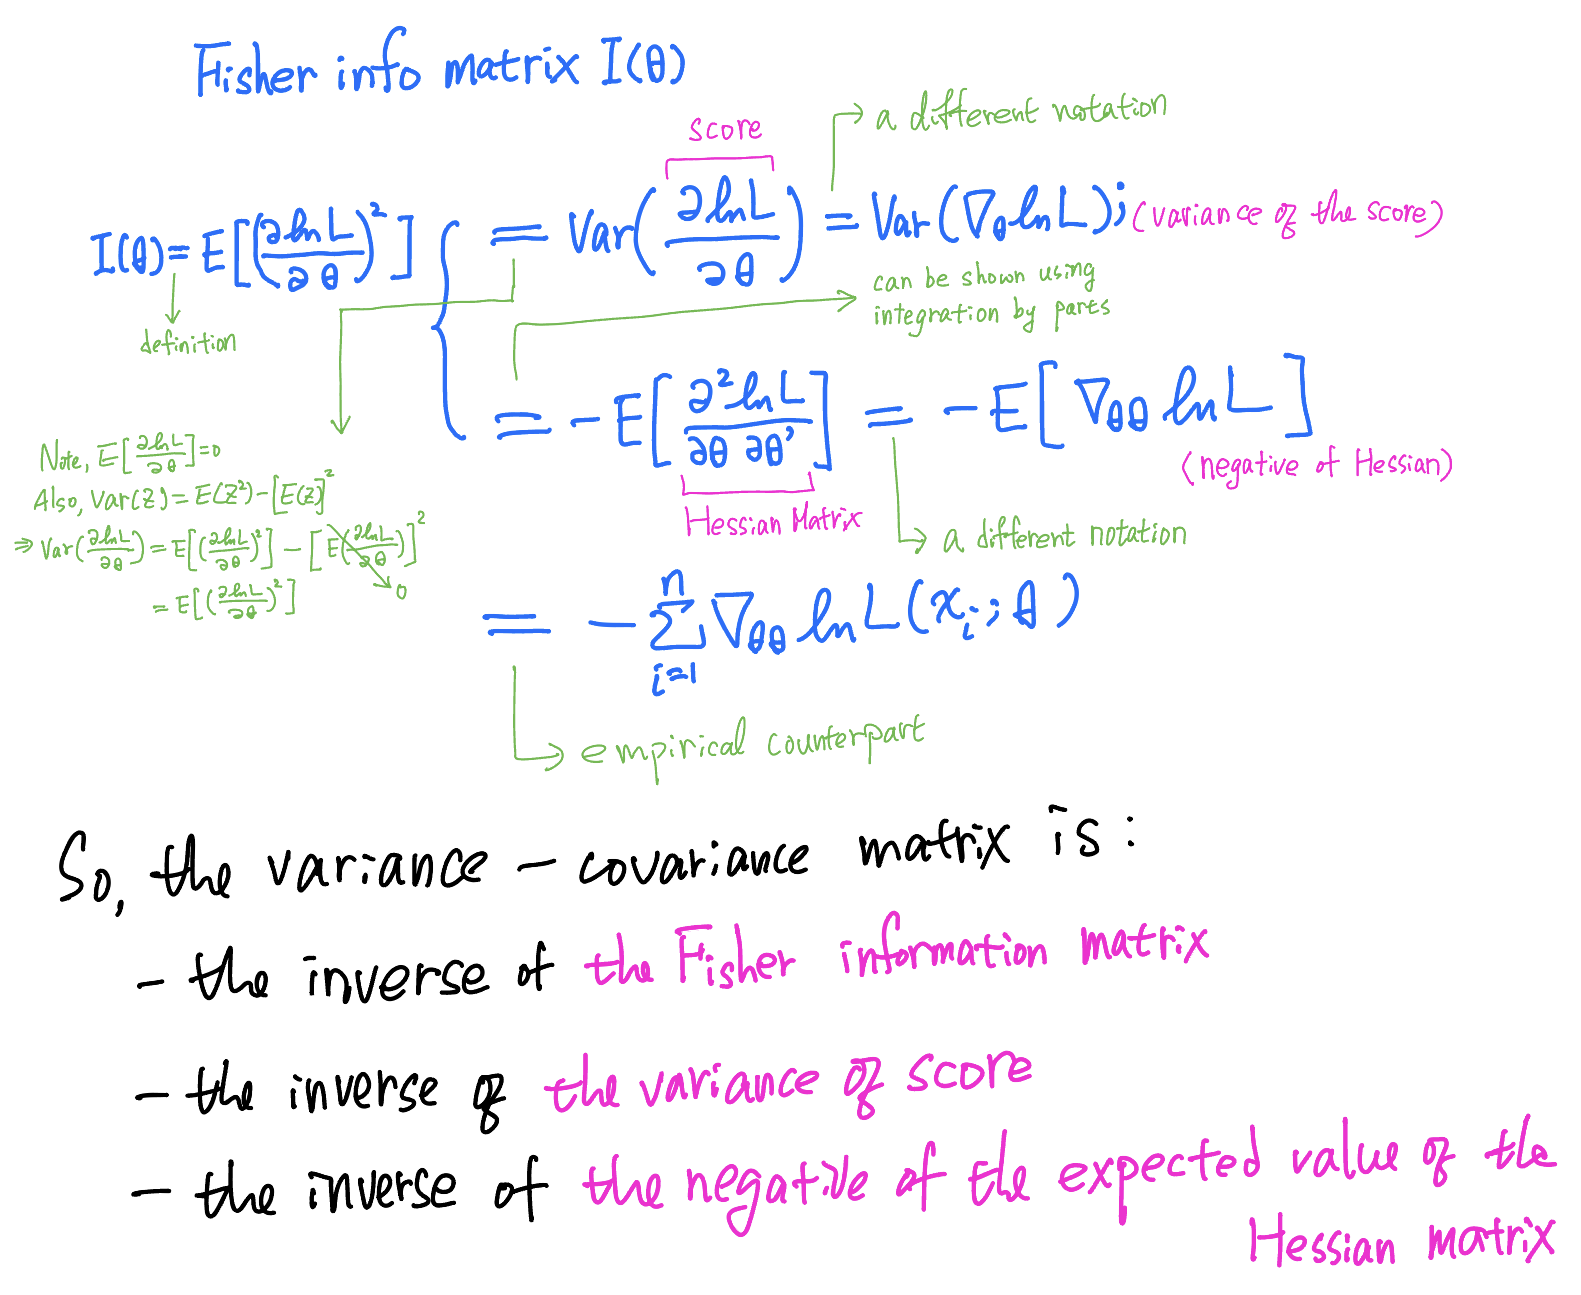

The above results show that there are at least two ways to compute the var-covariance matrix.

###### the inverse of the negative of the Hessian

-  $var(\hat{\theta}) = \Omega = I(\theta)^{-1} = \left[-E(\nabla_{\theta \theta}\ln L)\right]^{-1}$

- Based on the Hessian.

- Require the model $\ln L$ to be twice differentiable.

- Maybe readily available if using the Newton method in the optimization.

- **Very important:** The formula assumes that $\ln L$ is concave (for a maximization problem). We may re-write the formula as:
\begin{aligned}
- E[\nabla_{\theta \theta}\ln L]^{-1} = E[\nabla_{\theta \theta}(-\ln L)]^{-1}.\\
\mbox{ }
\end{aligned}

  - case A: $\nabla_{\theta \theta}(\ln L)$ is the Hessian calculated from $\ln L$ (which is concave).
    - You are likely to have this if you used a maximization algorithm (such as `newton_max_b`) in the computation. Then, remember to add the minus to the inverse of the Hessian.
  - case B: $\nabla_{\theta \theta}(-\ln L)$ is the Hessian calculated from $-\ln L$ (which is convex). 
    - You are likely to have this if you flip the sign of $\ln L$ and put $-\ln L$ in a minimization algorithm (such as Julia's `Optim`). In this case, you do not have to add the minus sign after the Hessian is calculated.


###### the inverse of the variance of scores

- $var(\hat{\theta}) = \Omega = I(\theta)^{-1} = var(\nabla_\theta \ln L )^{-1}$

- Based on the gradients.

- The method is called the **outer product of gradients** (OPG) estimator.

- Make sense if the optimization is gradient-based (e.g., BHHH).

- Empirically,

\begin{aligned}
var(\nabla_\theta \ln L )^{-1} = \left[ \sum_{i=1}^n \nabla_\theta \ln L_i \times \nabla_\theta \ln L_i' \right]^{-1}.
\end{aligned}

- Note that it requires the gradients at the observation level (i.e., $\ln L_i$). In Julia's `Optim` and other softwares, the gradients are often provided at the model level (i.e., $\ln L = \sum_i \ln L_i$, which adds all gradients over observations) and so such estimator is not readily available.


### Finally, the conversion of units


In previous examples, we parameterize the variance as $\sigma^2 = \exp(\rho)$ so that

- the $\hat{\sigma}$ is guaranteed to be positive,
- the parameter $\rho \in (-\infty,\ \infty)$ is unrestricted in the optimization.

After the estimation, we get $\hat{\rho}$ and also the standard error of $\hat{\rho}$ which is from the inverse of the information matrix. We can then easily get the point estimate of $\sigma^2$ by $\hat{\sigma}^2 = \exp(\hat{\rho})$. 

However, how about the variance or the standard error of $\hat{\sigma}^2$? We'll use _**the delta method**_ to approximate it. The approximation could be proved by using Taylor series expansions.

<div class="alert alert-block alert-info", style="max-width: 80%;">
Suppose $h()$ is a smooth function.
If $\hat{\rho}$'s variance is $\sigma_\rho^2$, then 
<ul>
    <li> the variance of $h(\hat{\rho})$ is approximated by $[h'(\hat{\rho})]^2 \sigma_\rho^2$, </li>
    <li> the standard error of $h(\hat{\rho})$ is approximated by $[h'(\hat{\rho})] \sigma_\rho$.</li>   
 </ul>
<br>Here, $h'(\hat{\rho})$ is the derivative of $h()$ with respect to $\rho$ evaluated at $\hat{\rho}$.
</div>

In our example, $h()$ is the $\exp()$ function. Because $\exp'(x) = \exp(x)$. Thus, for $\sigma^2 = \exp(\rho)$, the variance of $\hat{\sigma}^2$ according to the delta method is:

\begin{aligned}
var(\hat{\sigma}^2) = var(\exp(\hat{\rho})) \approx \exp(\hat{\rho})^2 \times \mbox{ the variance of } \hat{\rho}.
\end{aligned}


In [23]:
nofxvar = 3


#### alternative 8
y_data, x_data = DGP_cs(N=2000, nofx=nofxvar, α=0.7, β=0.5*ones(nofxvar), σₑ²=1.5, seed=1234)

func = TwiceDifferentiable(vars -> loglike5(y_data, x_data, vars[1], vars[2:nofxvar+1], vars[end]),
                           ones(nofxvar+2); autodiff = :forward)

res8 = optimize(func, 0.1*ones(nofxvar+2), Newton(),
                Optim.Options(g_tol = 1e-12,
                              iterations = 30) )
# coefficient vector
_coevec = Optim.minimizer(res8)
res8_coeff = deepcopy(_coevec)                # keep _coevec untouched
res8_coeff[end] = exp(_coevec[end])           # convert the unit of the last element

 
  # use Hessian matrix to obtain std. err.

res8_Hessian  = Optim.hessian!(func, _coevec)  # Hessain evaluated at the coeff vector, this is why we used deepcopy(), func is still in log unit, so we need to use _coevec (in log unit as well)

var_cov_matrix = inv(res8_Hessian)             # don't need the "negative" of Hessian. Why? Since already take negative in loglike5
stderror  = sqrt.(diag(var_cov_matrix))
stderror[end] = res8_coeff[end]*stderror[end]  # convert the unit using the delta method, exp(hat rho)*sigma_rho
t_stats = res8_coeff ./ stderror
res8_table = hcat(res8_coeff, stderror, t_stats)

println("The estimation table is")
res8_table |> display


########### My implementation of the outer product var-cov mat
#### alternative 8a

function score_i(f::Function, p0, y, x)
    # produce a k-by-n matrix of scores from each obs
    gd = zeros(size(p0,1), size(y, 1))  # n_of_para X n_of_obs
    for i in eachindex(y)
        f1(p) = f(p, y[i], x[i,:]) # x[i,:] extract the i th observation (row), but Julia return it as column
        gd[:,i] = ForwardDiff.gradient(f1, p0)
    end
    return gd # score for each observation i
end

             # concave, does not flip the sign
loglike8_i(p, yy, xx) =  (-0.5*log(2*π) .- log(sqrt(exp(p[end]))) .- 0.5 .*((yy .- p[1] .- xx'*p[2:end-1]) ./ sqrt(exp(p[end]))) .^2)[1]
# watch out the dimension of xx'(n_of_para x 1)


scores = score_i(loglike8_i, _coevec, y_data, x_data)

cov_OPG = inv(((scores)*scores'))

stderror_OPG  = sqrt.(diag(cov_OPG)) 
stderror_OPG[end] = res8_coeff[end]*stderror_OPG[end]   # delta method
t_stats_OPG = res8_coeff ./ stderror_OPG

res8_table_OPG = hcat(res8_coeff, stderror_OPG, t_stats_OPG)

println("The estimation table (based on OPG) is")
res8_table_OPG |> display



The estimation table is


5×3 Matrix{Float64}:
 0.712966  0.0271408  26.2691
 0.489078  0.0265527  18.4191
 0.555528  0.0269325  20.6267
 0.491443  0.0269139  18.2598
 1.47098   0.0465164  31.6228

The estimation table (based on OPG) is


5×3 Matrix{Float64}:
 0.712966  0.0271988  26.2132
 0.489078  0.0266866  18.3267
 0.555528  0.02606    21.3173
 0.491443  0.0268982  18.2705
 1.47098   0.0467154  31.4881

In [22]:
# Notice the use of deepcopy()

aa = rand(4)

bb=aa

bb[4]=1.0

bb

aa # aa also changed by bb

cc=deepcopy(aa)

cc[4]=100

cc

aa # aa did not change by cc

4-element Vector{Float64}:
 0.9342841078195695
 0.4223022825370445
 0.6274054732451447
 1.0

![](補充Lec13.png)

修正倒數第六行的一個錯誤: “by taking the average with its inverse" should be "by taking the average with its transpose".

（1）Fisher information matrix 的公式是期望值，但為何其 empirical counterpart 直接把每個觀察值的 Hessian 相加，而沒有除以資料筆數？（2）講義為何可以直接把 Hessian 取 inverse 就當作 variance-covariance matrix.

\begin{align*}
-E(\nabla_{\theta\theta}lnL)&=-E[\nabla_{\theta\theta}\text{ln}\sum l_i]\\
&=-\{E[\nabla_{\theta\theta}\text{ln}l_1]+E[\nabla_{\theta\theta}\text{ln}l_2]+...+E[\nabla_{\theta\theta}\text{ln}l_N]\}\\
&=-\{\nabla_{\theta\theta}\text{ln}l_1+\nabla_{\theta\theta}\text{ln}l_2+...+\nabla_{\theta\theta}\text{ln}l_N\}
\end{align*}

ChatGPT 有很好的解釋，我直接抄錄如下：

==== from ChatGPT =========

When calculating the empirical or observed Fisher information matrix from a set of observations, you would typically sum the individual observation-level derivatives, rather than taking the mean. 

This is because the empirical Fisher information matrix is essentially an estimate of the expected Fisher information matrix using the actual observed data. 

For example, let's say you have a sample of n=12 observations and a parameter vector θ. You would compute the information matrix I(θ) as follows:

1. Compute the second partial derivative of the log-likelihood (or the product of first derivatives) with respect to each parameter θ_i and θ_j for each observation. This will give you a 12 x k x k array (for k parameters).

2. Sum the derivative matrices across all observations. This will give you a single k x k matrix, which is your empirical Fisher information matrix.

Remember, the Fisher information matrix provides a measure of how much information your data carries about the parameters of your model, on average. By summing across all observations, you are effectively averaging the information across your data sample. Taking the sum rather than the mean makes sense because it reflects the accumulation of information from each additional data point. The more data points you have, the more information you have about the parameters.

In essence, the observed information matrix is calculated based on the actual data, while the Fisher information matrix is calculated based on all possible outcomes of the data (hence the expectation).



有關第二個問題：因為 `Optim` 套件已經幫我們把 Hessian 算好了，就是它已經把每個觀察值的 Hessian 相加了，我們直接用就可以。我本來想讓你們手動寫程式，後來想算了。